age

sex

chest pain tcype (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

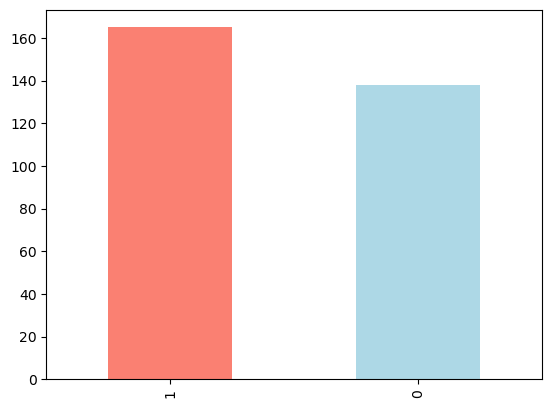

In [3]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]); #showing % of people with / without HD.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

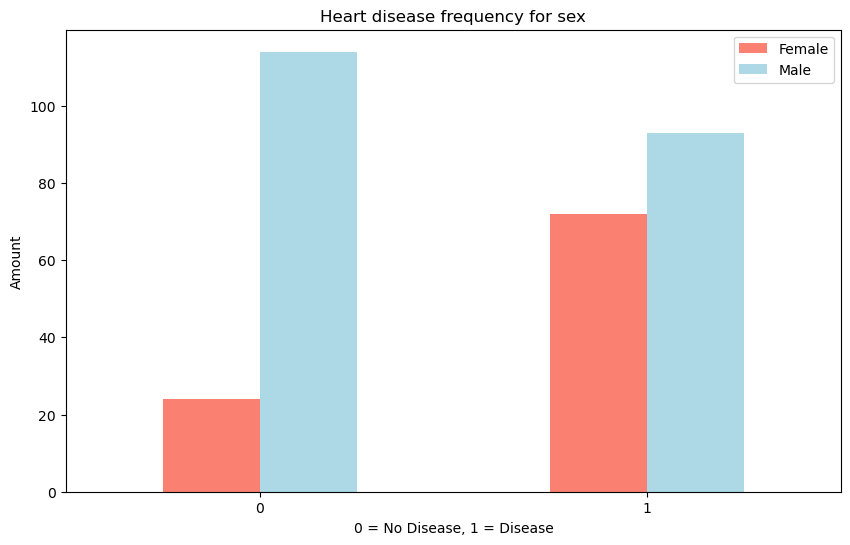

In [7]:
#compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

age vs max heart rate (valach) for heart disease

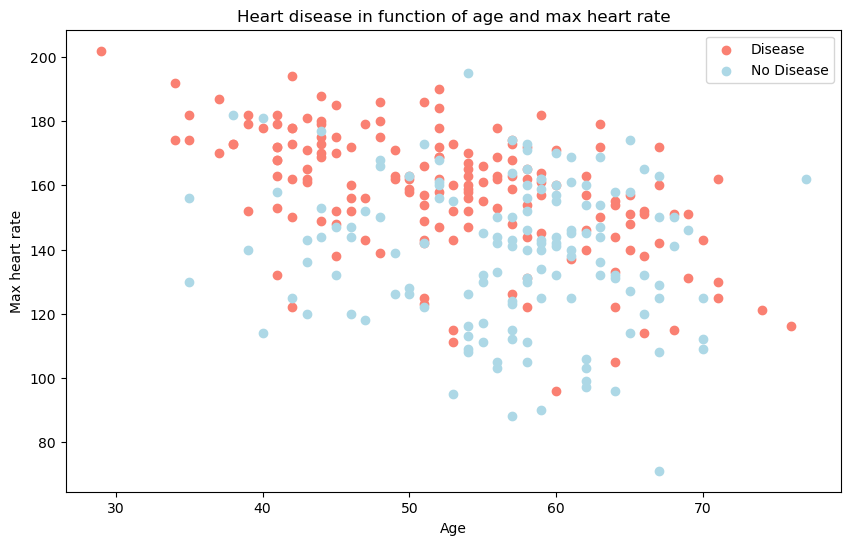

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],  # target with positive examples
           df.thalach[df.target==1],
           c="salmon");

#target with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

#labels
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);

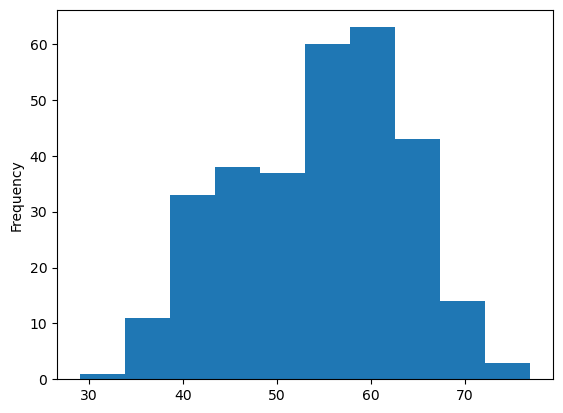

In [9]:
#check age distribution with histogram
df.age.plot.hist();

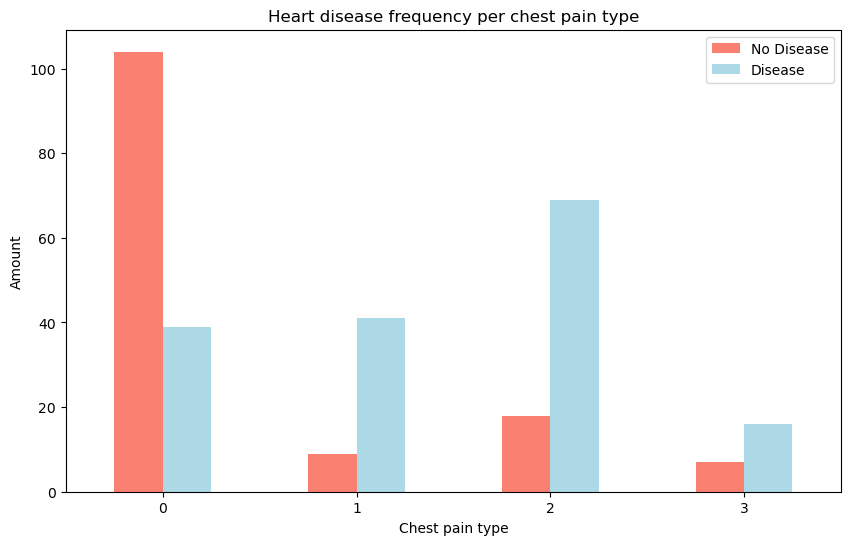

In [10]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [11]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


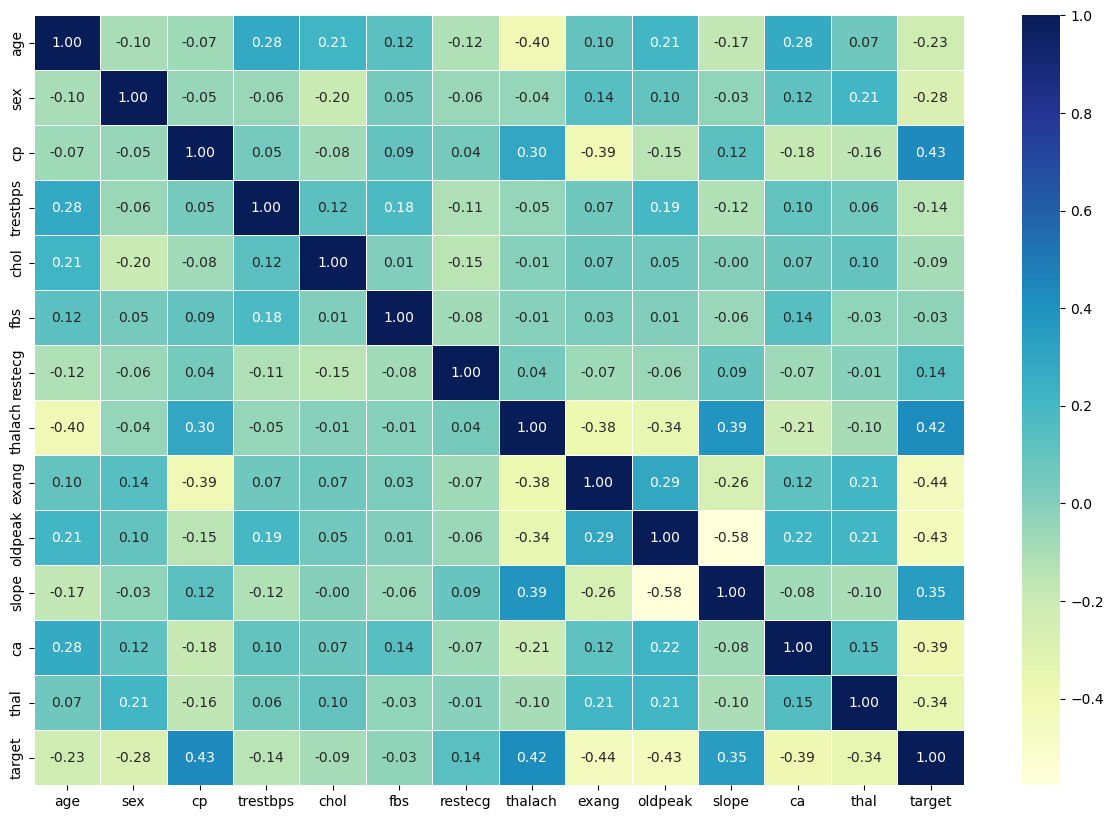

In [12]:
# let's make data look nicer through a heat map
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True, # this means.. allowing us to annotate 
                linewidths=0.5,
                fmt=".2f", # means format
                cmap="YlGnBu"); # means yellow green blue

modelling

In [13]:
x = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [14]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [15]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

we're going to try 3 different machine learning models, all of which are obviously classification. 

1) linear regression (not on scikit learn tree, Daniel found this from word of mouth)

2) K-Nearest neighbours classifier

3) Random Forest Classifier

In [16]:
# put models in dictionary
models = {"Logisical Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(model, x_train, x_test, y_train, y_test):
    '''
    Fit and evaluates given machine learning models: a dict of different sklearn machine learning models.
    x_train: training data (no labels)
    x_Test: testing data (no labels) : no labels means they only contain feature data and not target data
    y_train: training labels
    y_Test: test labels
    '''
    
    np.random.seed(42)
    # make dict to keep model scores
    model_scores = {}
    #loop through models:
    for name, model in model.items():
        #fit model to data
        model.fit(x_train, y_train)
        #evaluate model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [17]:
model_scores = fit_and_score(model = models,
                            x_train = x_train,
                            y_train = y_train,
                            x_test = x_test,
                            y_test = y_test)

model_scores

/Users/nielsenreaveley/Desktop/sample_project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisical Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# model comparison

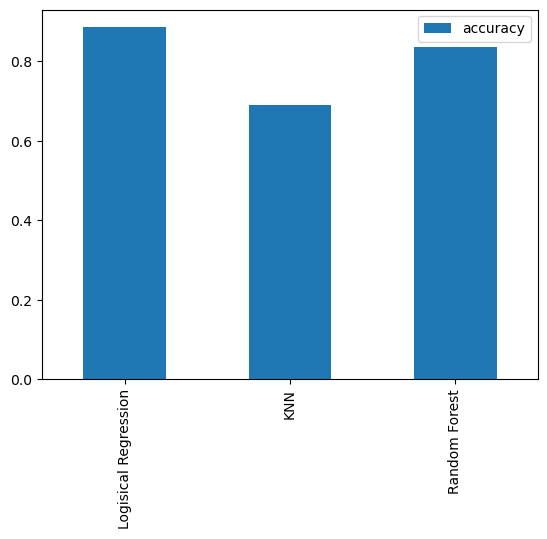

In [18]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

now we've got a model, and we know first predictions aren't always what we should base next steps off of, what should we do?

let's look at the following:

* hyperparameter tuning
* feature importance 
* confusion matrix
* cross-validation
* precision 
* recall
* F1 score
* classifiction report 
* ROC curve
* Area under the curve (AUC)

# hyperparameter tuning (by hand)

In [19]:
# let's tune KNN
train_scores = []
test_scores = []

#create a list of different values for n_neighbors 
neighbors = range(1,21)

#set up KNN instance 
knn = KNeighborsClassifier()

#loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm 
    knn.fit(x_train, y_train)
    
    #update the training scores list 
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test scores list 
    test_scores.append(knn.score(x_test, y_test))
    

In [20]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [21]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


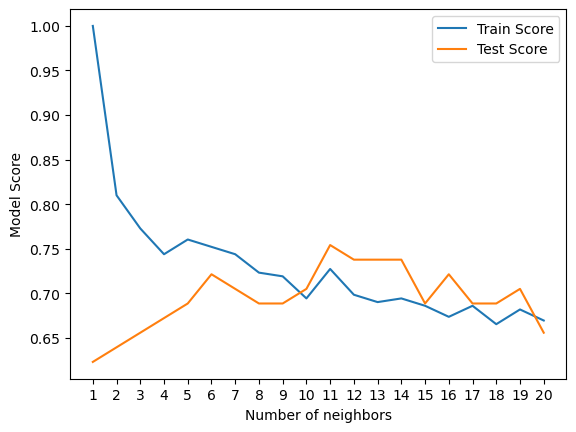

In [22]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# hyperparameter tuning with RandomizedSearchCV

note: we've now cut KNN out of race due to poor results, we used it above because we wanted to explore how to work with KNN. 

So we will be tuning on LogisticalRegression and RandomForest



In [23]:
# create a hyperparameter set for logistical regression
log_reg_grid = {"C": np.logspace(-4,4,20), # creates 20 numbers between -4 and 4
               "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50), # documentation advises us to create numbers even distribution apart
           # which is what 'arange' does, with the third parameter, 50 in this case, space between 2 numbers.
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [24]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [25]:
# tune LogisticRegression
np.random.seed(42)

#set up random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [26]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

now we've tuned LR, let's do same for RandomForestClassifier

In [28]:
np.random.seed(42)

#set up random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

# fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train);



Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [29]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
# evaluate randomziedsearchcv RandomForestClassifier model 
rs_rf.score(x_test, y_test)

0.8688524590163934

#  Unlike LogisticRegression, RandomForestClassifier model has improved by 3% as a result of tuning hyperparameters. However, because LogisticRegression model is still better, at 88% accurate, we will eliminate RandomForestClassifier, and use GridSearchCV for more exhaustive search to enhance hyperparameters to try to improve model more so.

# GridSearchCV, LogisticRegression


In [31]:
# different hyperparameters
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# set up grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid, #called param_distributions in RandomizedSearchCV
                         cv=5,
                         verbose=True) # no n_iter for GridSearchCV as it tries every option possible anyway.

# fit grid hyperparameter search model 
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [32]:
# check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
# evaluate LogisticRegression model on GridSearchCV
gs_log_reg.score(x_test, y_test)

0.8852459016393442

evaluating our machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix 
* Classification report
* Precision, recall and F1 score

it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions. 

In [34]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [35]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

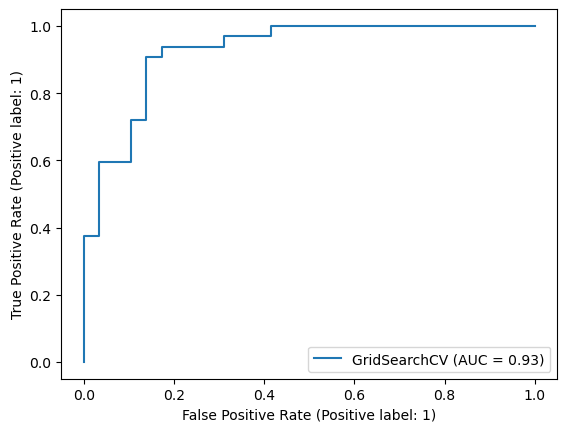

In [37]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test); 

In [38]:
# confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


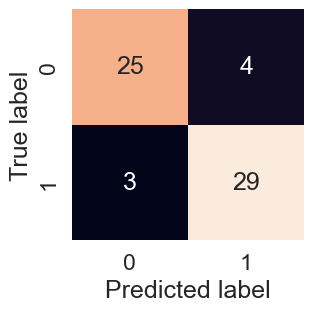

In [39]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)


In [40]:
print(classification_report(y_test, y_preds)) # below data: f1, precision, recall, may look like all the data we need
 # however, it's only using x_test data, so we need it for all data. It's only using one section, in our case, 20% atm

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [41]:
# calculating evaluation metrics using cross validation through `cross_val_score`


In [42]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# create a new classifier with best parameters 
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

In [44]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [45]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [46]:
# cross-validated precision 
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [47]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [48]:
# cross validated f-1 score
cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

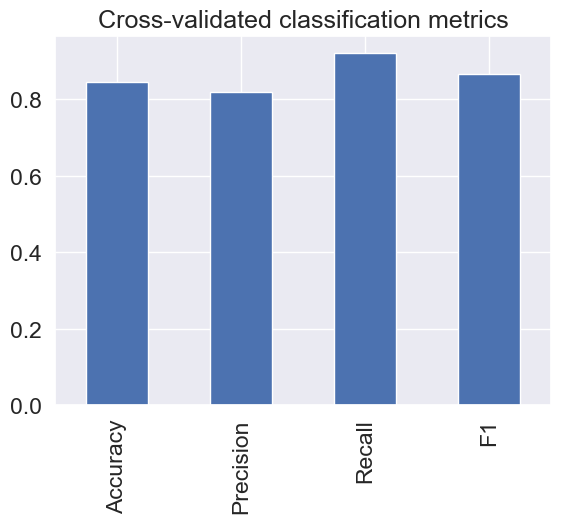

In [49]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])


cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

# feature importance

We googled model we are using and explored documentation to determine how to decide feature importance. Let's find feature importance for our LogisticRegression model

In [50]:
# fit an instance of LogisticRegression 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(x_train, y_train);

In [52]:
# we coef_ attribute that exists in LogisticRegression model 
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [53]:
# match coefs of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict 

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

^ this data above, is telling us, how much each column of data is affecting the target variable. 

<Axes: title={'center': 'Feature Importance'}>

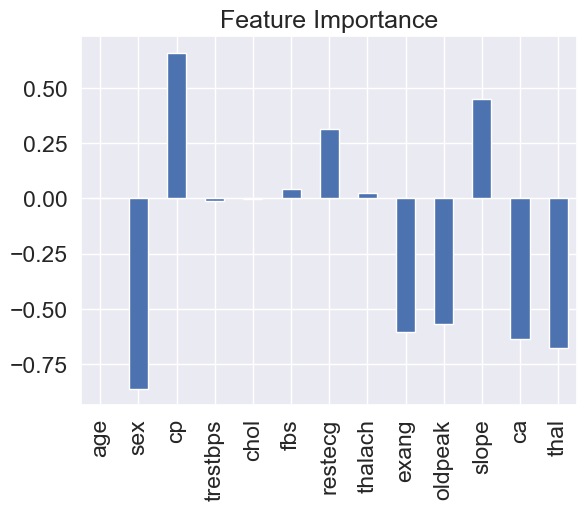

In [54]:
# visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)